# Scratchwork: 2-Regime Rybski Growth Models With Geographic Masks

The purpose of this document is to provide some simple demonstrations of the 2-regime Rybski-type growth model formulated by Ema and Adrian. It particularly focuses on the use of a geographic mask to allow urban growth to follow natural geographic contours. We specify these contours via a "mask", consisting of a matrix of entries between 0 and 1. Lower entries indicate areas that are more difficult to settle; entries of 0 correspond to areas that are impossible to settle (such as rivers). 

# Packages

In [1]:
from urban_growth.citymodel import *

import numpy as np
from itertools import product
from matplotlib import pyplot as plt

%matplotlib inline

# Parameters

In [2]:
L   = 100
T   = 100
TRE = 5
n_urban_seeds = 1
n_rural_seeds = 1
mask1 = np.ones((L, L))

mask2 = np.ones((L, L))
for i, j in product(np.arange(L), np.arange(L)):
    if j < L / 2.0:
        mask2[(i,j)] = 0
        
mask3 = np.ones((L,L))
for i, j in product(np.arange(L), np.arange(L)):
    if j < L / 5.0:
        mask3[(i,j)] = 0
    elif j < L / 2.0:
        mask3[(i,j)] = .3

# Visualizing Masks

Let's take a quick look at the masks. In the plot below, darker areas are more difficult to be occupied. 

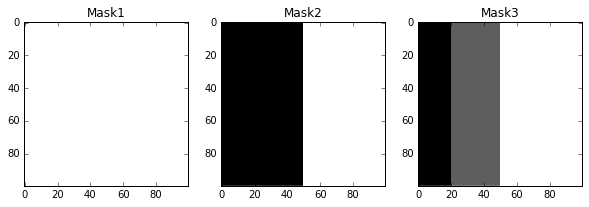

In [3]:
fig = plt.figure(figsize = (10, 6))

ax1 = fig.add_subplot(131)
plt.title('Mask1')

ax2 = fig.add_subplot(132)
plt.title('Mask2')

ax3 = fig.add_subplot(133)
plt.title('Mask3')

pars = {'cmap' : plt.get_cmap('Greys_r'), 
        'vmin' : 0, 
        'vmax' : 1, 
        'interpolation' : 'None'}

first = ax1.imshow(mask1, **pars)
second = ax2.imshow(mask2, **pars)
second = ax3.imshow(mask3, **pars)

So, the first mask represents no geographic constraints, while the second has one half of the analyzed area that is completely unable to be occupied. The third mask has a zone that cannot be occupied, as well as another zone that can be occupied but is considerably more difficult to settle. Obviously, in applications we would make the mask correspond to geographic features. 

# Incorporating the Masks into Models

Let's run some models using these masks! In this case, we'll just check each model after a few time steps. 

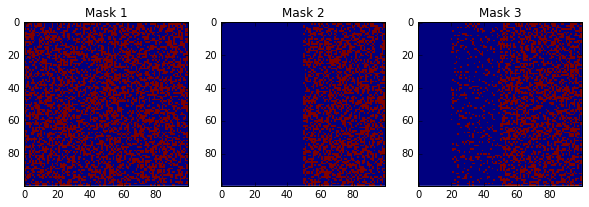

In [6]:
masks = [mask1, mask2, mask3]
fig = plt.figure(figsize = (10, 6))
i = 0
for mask in range(len(masks)):
    R = RybskiModel(L = L,
                T = T,
                TRE = TRE, 
                n_urban_seeds = n_urban_seeds, 
                n_rural_seeds = n_rural_seeds,
                Mu = None, 
                Mr = None, 
                mask = masks[i])

    traj = R.forward(gu = .1,
          gr = .01, 
          Ue = 80, 
          niter = 51, 
          save_every =1)
    
    ax = fig.add_subplot(1, len(masks), i + 1)
    ax.imshow(traj[50]['M'], interpolation = 'None')
    ax.set(title = 'Mask ' + str(i + 1))
    i += 1

These results are what we would expect. Without geographic constraints (Mask 1), growth is uninhibited. The "hard" geographic constraint in Mask 2 causes there to be no settlement at all on the western side. In Mask 3, there is no settlement in the far west, and only sparse settlement in the intermediate west. 